In [163]:
import os
import pandas as pd
import numpy as np
import imageio
from skimage.color import rgb2gray
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from PIL import Image, ImageFile
import urllib.request
import requests
from io import BytesIO
from random import choices

In [26]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [134]:
df = pd.read_csv("../data/data_csv/pic_0.csv")

In [135]:
df.head()

,Unnamed: 0,CityID,pic
0,0,g32999,"url(""https://dynamic-media-cdn.tripadvisor.com..."
1,1,g32999,"url(""https://dynamic-media-cdn.tripadvisor.com..."
2,2,g32999,"url(""https://dynamic-media-cdn.tripadvisor.com..."
3,3,g32999,"url(""https://dynamic-media-cdn.tripadvisor.com..."
4,4,g32999,"url(""https://dynamic-media-cdn.tripadvisor.com..."


In [142]:
df = df.drop_duplicates(subset='pic', keep="first")

In [40]:
test = df['pic'][1].split('"')[1]
test

'https://dynamic-media-cdn.tripadvisor.com/media/photo-o/16/47/b8/d4/yosemite-valley-raymond.jpg?w=500&h=400&s=1'

In [58]:
response = requests.get(test)
img = Image.open(BytesIO(response.content))
a1 = np.asarray(img)
a1.shape

(400, 500, 3)

In [52]:
def pic2url(pic):
    return pic.split('"')[1]

In [143]:
df['url'] = df.pic.apply(pic2url) 

In [57]:
df.url[2]

'https://dynamic-media-cdn.tripadvisor.com/media/photo-c/2560x500/15/0d/b4/af/caption.jpg?w=900&h=-1&s=1'

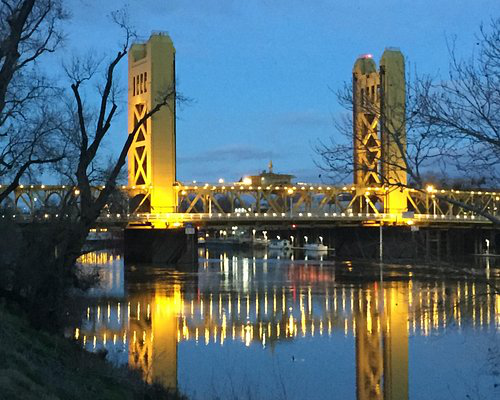

In [44]:
img

In [59]:
response = requests.get(df.url[1])
img = Image.open(BytesIO(response.content))
a1 = np.asarray(img)
a1.shape

(400, 500, 3)

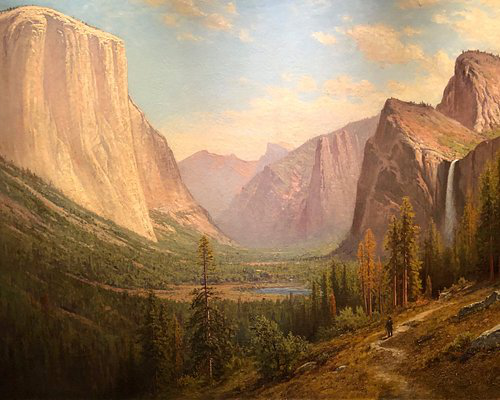

In [60]:
img

In [144]:
def url2RGB(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    a1 = np.asarray(img)
    return a1

In [145]:
df['RGB'] = df.url.apply(url2RGB)

In [146]:
df.head()

,Unnamed: 0,CityID,pic,url,RGB
0,0,g32999,"url(""https://dynamic-media-cdn.tripadvisor.com...",https://dynamic-media-cdn.tripadvisor.com/medi...,"[[[88, 126, 165], [27, 65, 104], [4, 39, 77], ..."
1,1,g32999,"url(""https://dynamic-media-cdn.tripadvisor.com...",https://dynamic-media-cdn.tripadvisor.com/medi...,"[[[145, 161, 161], [145, 161, 161], [144, 160,..."
2,2,g32999,"url(""https://dynamic-media-cdn.tripadvisor.com...",https://dynamic-media-cdn.tripadvisor.com/medi...,"[[[3, 65, 114], [3, 65, 114], [3, 65, 114], [3..."
3,3,g32999,"url(""https://dynamic-media-cdn.tripadvisor.com...",https://dynamic-media-cdn.tripadvisor.com/medi...,"[[[226, 190, 200], [251, 216, 223], [255, 245,..."
4,4,g32999,"url(""https://dynamic-media-cdn.tripadvisor.com...",https://dynamic-media-cdn.tripadvisor.com/medi...,"[[[30, 33, 52], [3, 6, 25], [8, 11, 28], [37, ..."


In [147]:
len(df)

90

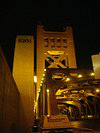

In [152]:
Image.fromarray(df.RGB[48])

In [173]:
class_list = ["architecture","food&drink","art&culture","travel&adventure"]

In [153]:
# read the pictures in the EuroSAT 
paths = ['/Users/qianzhuang/Academic/Upenn/Capstone/model/food41',
        '/Users/qianzhuang/Academic/Upenn/Capstone/model/indoor-scenes-cvpr-2019']

In [154]:
# get the path of each picture
All_files = []
# r=root, d=directories, f = files
for path in paths:
    files = []
    for r, d, f in os.walk(path):
        for file in f:
            if '.jpg' in file:
                files.append(os.path.join(r, file))
    All_files.append(files)

In [155]:
lables = ['food','indoor']

In [164]:
All_random_list = []
for sub_list in All_files:
    random_sub_list = choices(sub_list, k = 3000)
    All_random_list.append(random_sub_list)

In [172]:
import shutil

target_dir = "/Users/qianzhuang/Academic/Upenn/Capstone/model/Sum/"

for i in range(0,len(All_random_list)):
    k = 0
    for file in All_random_list[i]:
        target = target_dir+str(lables[i])+"/"+str(k)+".jpg"
        shutil.copyfile(file,target)
        k = k+1

In [213]:
path = "/Users/qianzhuang/Academic/Upenn/Capstone/model/image-classification/images/images"
files = []

In [214]:
for r, d, f in os.walk(path):
    for file in f:
        if '.jpg' in file:
            files.append(os.path.join(r, file))

In [215]:
df = pd.DataFrame(files)

In [216]:
df = df.rename({0:"path"},axis = 1)

In [217]:
df.path[10000].split('/')[-2]

'architecure'

In [218]:
def getLabel(string):
    return string.split('/')[-2]

In [219]:
df['labels'] = df.path.apply(getLabel)

In [220]:
df.head()

,path,labels
0,/Users/qianzhuang/Academic/Upenn/Capstone/mode...,food&drink
1,/Users/qianzhuang/Academic/Upenn/Capstone/mode...,food&drink
2,/Users/qianzhuang/Academic/Upenn/Capstone/mode...,food&drink
3,/Users/qianzhuang/Academic/Upenn/Capstone/mode...,food&drink
4,/Users/qianzhuang/Academic/Upenn/Capstone/mode...,food&drink


In [221]:
len(df)

31781

In [222]:
# create a function to create a RGB pic
def creatRGB(array):
    array = imageio.imread(array)
    pixels = np.asarray(array)
    imge = pixels.astype('uint8')
    return imge

In [223]:
creatRGB(df.path[0]).shape

(240, 326, 3)

In [224]:
df['RGB'] = df.path.apply(creatRGB)

/Users/qianzhuang/anaconda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:804: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [225]:
df.head()

,path,labels,RGB
0,/Users/qianzhuang/Academic/Upenn/Capstone/mode...,food&drink,"[[[39, 26, 20], [43, 30, 24], [48, 35, 29], [5..."
1,/Users/qianzhuang/Academic/Upenn/Capstone/mode...,food&drink,"[[[118, 103, 110], [119, 104, 111], [119, 104,..."
2,/Users/qianzhuang/Academic/Upenn/Capstone/mode...,food&drink,"[[[165, 63, 61], [163, 63, 61], [161, 61, 61],..."
3,/Users/qianzhuang/Academic/Upenn/Capstone/mode...,food&drink,"[[[57, 51, 17], [54, 48, 16], [51, 45, 13], [5..."
4,/Users/qianzhuang/Academic/Upenn/Capstone/mode...,food&drink,"[[[240, 230, 203], [240, 228, 202], [240, 229,..."


In [ ]:
df.to_csv("./RGB.csv")